# Binary Handwritten Digit Recognition

Train a neural network that is written from scratch to recognize binary digit 0 and 1.

## Import Libraries

- `numpy` - Data Loading
- `matplotlib` - Data Visualization
- Other libraries imported are written from scratch

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from layers.input_layer import Input_Layer
from layers.fc_layer import FC_Layer
from loss.binary_crossentropy import binary_crossentropy
from neural_network import NN

## Loading Data

Load 100 examples for training purposes and another 100 examples for testing purposes. This dataset is taken from Andrew Ng's Machine Learning Specialization course.

In [2]:
X = np.load("data/X.npy")
y = np.load("data/y.npy")

y = y.astype(np.float32)

idx = np.random.random_integers(0, 1000, size=(200))

X_train = X[idx[0:100]]
y_train = y[idx[0:100]]
y_train = y_train.reshape(-1)
X_test = X[idx[100:200]]
y_test = y[idx[100:200]]
y_test = y_test.reshape(-1)

print(f"X_train shape: {X_train.shape}")
print(f"X_train type: {X_train.dtype}")
print(f"y_train shape: {y_train.shape}")
print(f"y_train type: {y_train.dtype}")

X_train shape: (100, 400)
X_train type: float64
y_train shape: (100,)
y_train type: float32


C:\Users\ACER\AppData\Local\Temp\ipykernel_19332\3961281445.py:6: DeprecationWarning: This function is deprecated. Please call randint(0, 1000 + 1) instead
  idx = np.random.random_integers(0, 1000, size=(200))


## Modeling

Define a neural network with 
- 3 Fully Connected layers along with Sigmoid activation function
- Binary Crossentropy loss function

In [3]:
nn = NN([
    Input_Layer(400),
    FC_Layer(32, 'sigmoid'),
    FC_Layer(16, 'sigmoid'),
    FC_Layer(1, 'sigmoid'),
], loss_fn=binary_crossentropy, learning_rate=0.1)

## Training

Train the neural network 50 times using the same dataset. Didn't do more training because the neural network is very slow.

In [4]:
import math
def binary_crossentropy_no_grad(y_pred, y):
    y_pred = y_pred[0]
    return -y * (math.log(y_pred)) -(1.0-y) * (math.log(1.0-y_pred))

In [5]:
for k in range(50):
    nn.fit(X_train, y_train)
    y_pred = nn.predict(X_train)
    loss = [binary_crossentropy_no_grad(y_pred[i], y_train[i]) for i in range(len(y_train))]
    print(f"Epoch {k}\nLoss: {sum(loss)/len(y_train)}")
    accuracy = [(1 if y_pred[i][0] > 0.5 else 0) == y_train[i] for i in range(len(y_train))]
    print(f"Accuracy: {sum(accuracy)/len(y_train)}")

Epoch 0
Loss: 0.8867664095725408
Accuracy: 0.38
Epoch 1
Loss: 0.8282344244629621
Accuracy: 0.33
Epoch 2
Loss: 0.787566228507949
Accuracy: 0.3
Epoch 3
Loss: 0.7585725817336724
Accuracy: 0.32
Epoch 4
Loss: 0.7369872410659805
Accuracy: 0.4
Epoch 5
Loss: 0.7200504310048711
Accuracy: 0.51
Epoch 6
Loss: 0.7060364682314416
Accuracy: 0.53
Epoch 7
Loss: 0.6938833863433822
Accuracy: 0.57
Epoch 8
Loss: 0.6829410867763736
Accuracy: 0.59
Epoch 9
Loss: 0.672811083991857
Accuracy: 0.62
Epoch 10
Loss: 0.6632477166598357
Accuracy: 0.63
Epoch 11
Loss: 0.6540981105327224
Accuracy: 0.66
Epoch 12
Loss: 0.6452658798836142
Accuracy: 0.67
Epoch 13
Loss: 0.63668919158316
Accuracy: 0.67
Epoch 14
Loss: 0.6283274833634788
Accuracy: 0.68
Epoch 15
Loss: 0.6201533967669614
Accuracy: 0.69
Epoch 16
Loss: 0.6121478584340678
Accuracy: 0.73
Epoch 17
Loss: 0.6042970673913628
Accuracy: 0.73
Epoch 18
Loss: 0.596590639616091
Accuracy: 0.74
Epoch 19
Loss: 0.5890204573079961
Accuracy: 0.75
Epoch 20
Loss: 0.5815799485127018
Acc

## Predicting on Unseen Data

In [27]:
# Run prediction across every training examples in X_test
pred = nn.predict(X_test)

In [28]:
# Compute loss value
loss = [binary_crossentropy_no_grad(pred[i], y_test[i]) for i in range(len(y_test))]
print(f"Loss: {sum(loss)/len(y_test)}")

# Compute accuracy
pred = [(1 if pred[i][0] > 0.5 else 0) for i in range(len(pred))]
accuracy = [pred[i] == y_test[i] for i in range(len(y_test))]
print(f"Accuracy: {sum(accuracy)/len(y_test)}")

Loss: 0.4061548908336573
Accuracy: 0.94


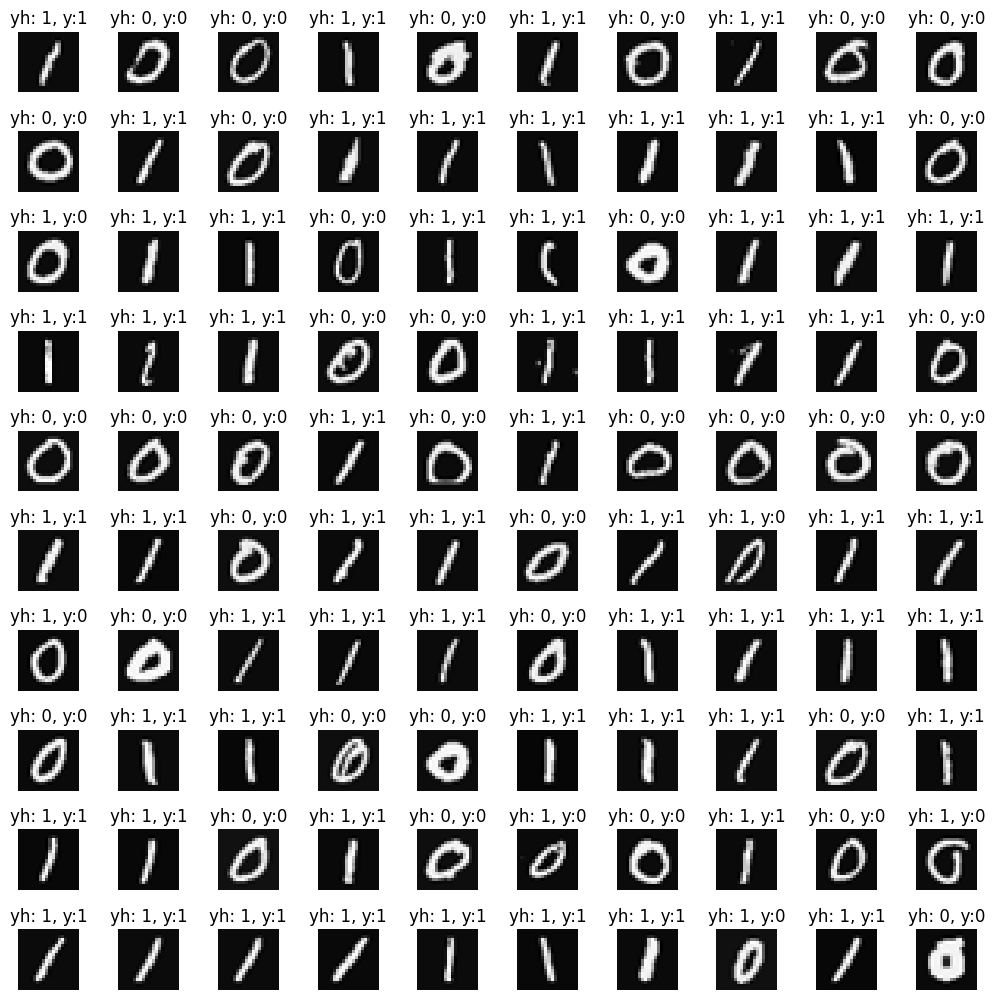

In [30]:
# Plotting all testing examples
fig, ax = plt.subplots(10, 10, figsize=(10, 10))
fig.tight_layout(pad=0.2)

for i in range(len(pred)):
    ax[i//10, i%10].set_axis_off()
    ax[i//10, i%10].imshow(X_test[i].reshape(20, 20).T, cmap='gray')
    ax[i//10, i%10].set_title(f"yh: {pred[i]}, y:{int(y_test[i])}")

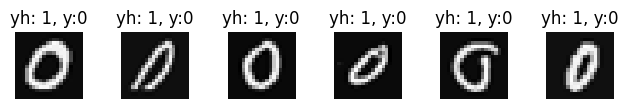

In [43]:
# Find misclassified examples
mis = [pred[i] != y_test[i] for i in range(len(y_test))]

# Plotting misclassified examples
fig, ax = plt.subplots(1, 6)

fig.tight_layout(pad=0.2)

cnt = 0
for i in range(len(mis)):
    if (mis[i]):
        ax[cnt].set_axis_off()
        ax[cnt].imshow(X_test[i].reshape(20, 20).T, cmap='gray')
        ax[cnt].set_title(f"yh: {pred[i]}, y:{int(y_test[i])}")
        cnt+=1